In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

###### import data and deleting column 'NO' and changing the index range of rows.


In [ ]:
data_path = '/content/Real estate.csv'
real_estate_data = pd.read_csv(data_path)
real_estate_data.drop(columns=['No'], inplace=True)
real_estate_data.index = range(1, len(real_estate_data) + 1)
real_estate_data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### The dataset contains the following columns:

*  X1 transaction date: The transaction date.
*  X2 house age: The age of the house in years.
*  X3 distance to the nearest MRT station: The distance to the nearest Mass
  Rapid Transit (MRT) station in meters.
*  X4 number of convenience stores: The number of convenience stores in the
   living circle on foot.
*  X5 latitude: The geographic coordinate that specifies the north–south
   position.
*  X6 longitude: The geographic coordinate that specifies the east-west position.
*  Y house price of unit area: The house price of unit area.

# Data preprocessing



 # A.	Explore and clean the dataset. Explain your steps and reasons behind your actions (such as choosing a specific imputation technique).




#### We have 414 rowes and 8 features in this dataset

In [ ]:
real_estate_data.shape

(414, 7)

#### In the output of this code, we can see what range of values ​​each quantitative and qualitative variable of the data set is in.


In [ ]:
unique_values = {col: real_estate_data[col].unique()[:30] for col in real_estate_data.columns}
for col, values in unique_values.items():
    print(f"{col}: {values}")

X1 transaction date: [2012.917 2013.583 2013.5   2012.833 2012.667 2013.417 2013.083 2013.333
 2013.25  2012.75  2013.    2013.167]
X2 house age: [32.  19.5 13.3  5.   7.1 34.5 20.3 31.7 17.9 34.8  6.3 13.  20.4 13.2
 35.7  0.  17.7 16.9  1.5  4.5 10.5 14.7 10.1 39.6 29.3  3.1 10.4 19.2
 25.9 29.6]
X3 distance to the nearest MRT station: [  84.87882  306.5947   561.9845   390.5684  2175.03     623.4731
  287.6025  5512.038   1783.18     405.2134    90.45606  492.2313
 2469.645   1164.838    579.2083   292.9978   350.8515   368.1363
   23.38284 2275.877    279.1726  1360.139    480.6977  1487.868
  383.8624   276.449    557.478    451.2438  4519.69     769.4034 ]
X4 number of convenience stores: [10  9  5  3  7  6  1  4  2  8  0]
X5 latitude: [24.98298 24.98034 24.98746 24.97937 24.96305 24.97933 24.98042 24.95095
 24.96731 24.97349 24.97433 24.96515 24.96108 24.99156 24.9824  24.97744
 24.97544 24.9675  24.96772 24.96314 24.97528 24.95204 24.97353 24.97542
 24.98085 24.95593 24.97419 2

In [ ]:
real_estate_data.nunique()

X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

#### At this stage, we have an overview of a type of dataset features.All are slightly continuous except variable 'X4 number of convenience stores ' (qualitative  with 10 levels).


In [ ]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


#### The frequency of 'number of convenience stores' variable values ​​is reported as the only qualitative variable.


In [ ]:
frequency =real_estate_data['X4 number of convenience stores'].value_counts()
print(frequency)

X4 number of convenience stores
5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: count, dtype: int64


#### It has no missing data feature, so no data IMPUTATION  techniques are required.


In [ ]:
missing_values = real_estate_data.isnull().sum()
missing_values

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
real_estate_data.shape

(414, 7)

#### There are no duplicate rows and the shape of the data has not changed.


In [ ]:
real_estate_data.drop_duplicates().shape

(414, 7)

### As one of the stages of feature engineering, a new feature is formed by multiplying two variables 'X5 latitude' and 'X6 longitude' which we can see below has a relatively good correlation with the target variable.

In [ ]:
real_estate_data['area']= real_estate_data['X5 latitude'] * real_estate_data['X6 longitude']
real_estate_data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,area
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,3036.437385
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,3036.098283
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,3037.073589
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,3037.073589
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,3036.053829


##descriptive_statistics

In [ ]:
descriptive_statistics = real_estate_data.drop(columns=['X1 transaction date']).describe()
descriptive_statistics

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193,3034.570226
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488,1.702503
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,3029.644670
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,3033.378176
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,3034.937119
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,3035.796758
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,3039.726950


# B.	Visualize your data to gain better insights. Explain your findings.

## Univariate charts

## Draw a  for chart the qualitative feature

### bar chart
### This chart and pie chart shows that with a frequency of 67, there were no convenience stores around most of the houses, or if there were, in many cases the number was 5 on average. The distribution of this variable does not follow the normal distribution and as it is clear in the bar chart, there are two picks with the highest frequency in the data.

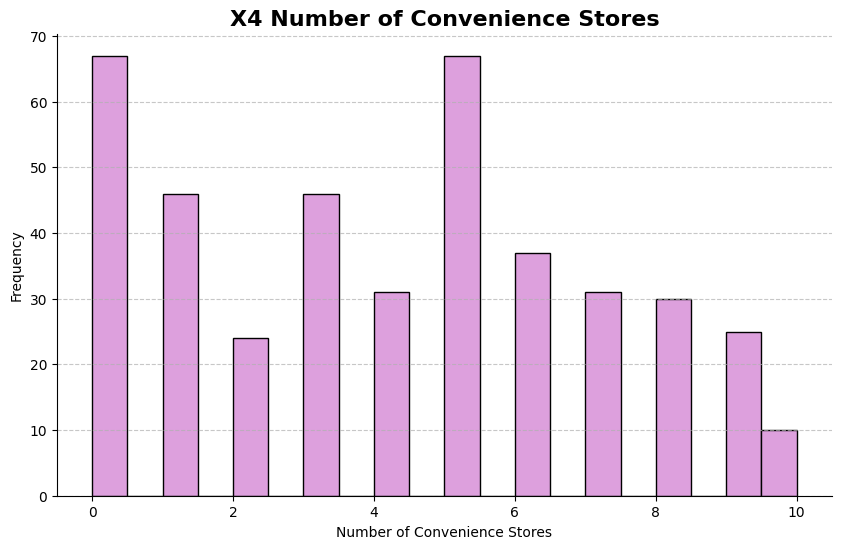

In [ ]:
plt.figure(figsize=(10, 6))
real_estate_data['X4 number of convenience stores'].plot(kind='hist', bins=20, color='plum', edgecolor='black')
plt.xlabel('Number of Convenience Stores')
plt.ylabel('Frequency')
plt.title('X4 Number of Convenience Stores', fontsize=16, fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### pie chart

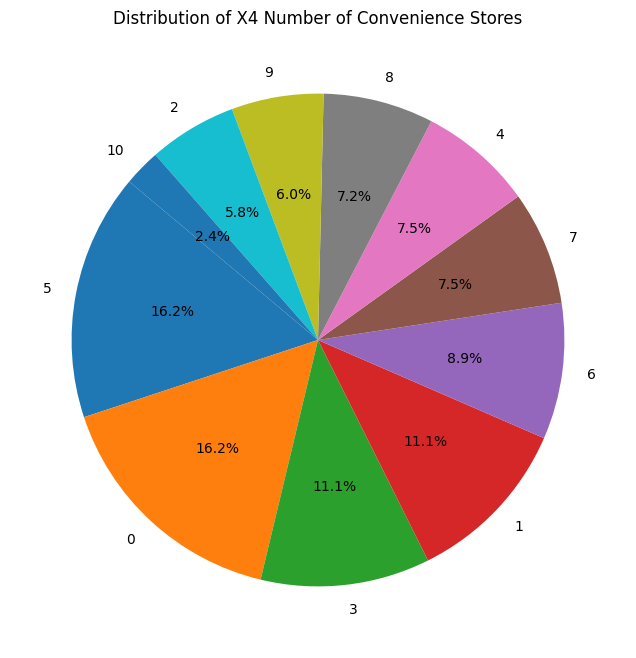

In [ ]:
store_counts = real_estate_data['X4 number of convenience stores'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(store_counts, labels=store_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of X4 Number of Convenience Stores')
plt.show()

## Time series chart of transaction dates

#### According to this chart, the number of transactions fluctuated during this period. First, starting from September 2021, we see a gradual increase in the number of transactions, reaching around 35 transactions in November 2021. After that there is a relatively small decrease in the number of transactions, reaching 30 transactions in January 2022. After this decrease, a stronger upward trend in the number of transactions begins, reaching the highest number of transactions in March 2023 with more than 50 transactions. But after this peak, a sharp drop in the number of transactions takes place, leading to almost a halving of the number of transactions in May 2023. Then we see an increase again leading to another peak in July 2023. These fluctuating patterns can be caused by seasonal factors, special economic events, or other factors affecting customer behavior or the transaction system.

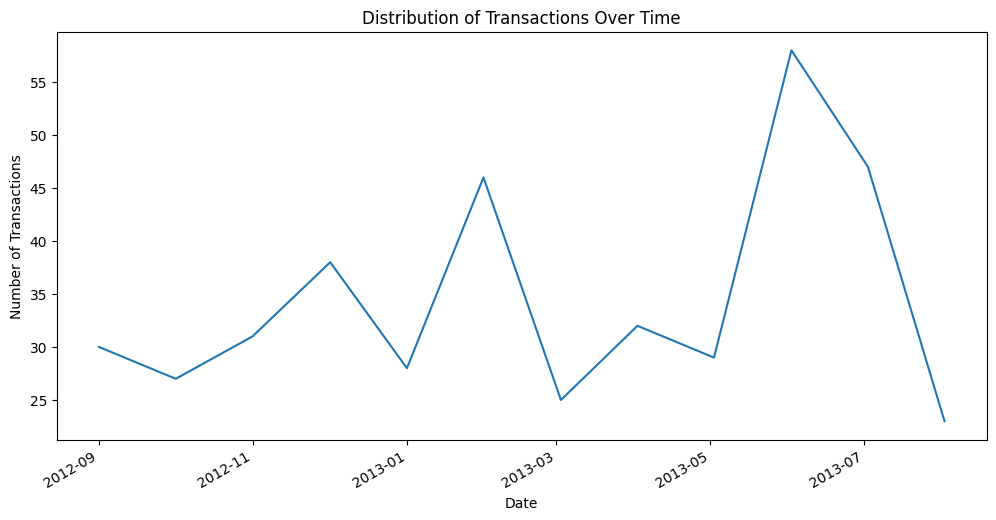

In [ ]:
def fractional_year_to_datetime(year):
    start = datetime(int(year), 1, 1)
    year_end = datetime(int(year) + 1, 1, 1)
    year_length = (year_end - start).days
    day_of_year = timedelta(days=(year - int(year)) * year_length)
    return start + day_of_year

real_estate_data['Transaction Date'] = real_estate_data['X1 transaction date'].apply(fractional_year_to_datetime)
real_estate_data['Transaction Date']

plt.figure(figsize=(12, 6))
real_estate_data['Transaction Date'].value_counts().sort_index().plot()
plt.title('Distribution of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


#### The centrality of the distribution, in fact, the largest number of data (fashion) are placed in the price range of 30 to 40 The graph seems skewed to the right, in fact the number of items with higher prices is less. This means that very high prices are rare, but can still be impressive. The presence of price ranges from low to high indicates the dispersion of price values ​​for the area unit. Ranges that are less frequent indicate that these homes are less common at this price. The breakout sequence on the left is shorter meaning lower prices are falling, while the one on the right is longer and continues to much higher prices.
*  The existence of a data in the price range of 100 to 120 (maximum) indicates an outlier data, which we impute this with the average of feature.(in order to check outlier data)

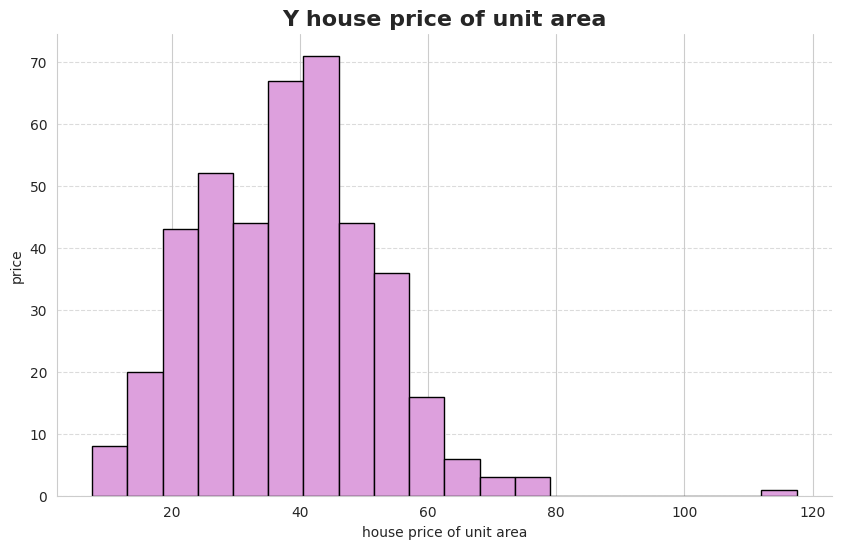

In [ ]:
plt.figure(figsize=(10, 6))
real_estate_data['Y house price of unit area'].plot(kind='hist', bins=20, color='plum', edgecolor='black')
plt.xlabel('house price of unit area')
plt.ylabel('price')
plt.title('Y house price of unit area', fontsize=16, fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
real_estate_data['Y house price of unit area'].replace(real_estate_data['Y house price of unit area'].max(), real_estate_data['Y house price of unit area'].median(), inplace=True)


## Box chart between quantitative and qualitative feature

### Box plot between target feature(house price of unit area) and umber of convenience stores

### This box plot shows the house price per unit based on the number of convenience stores around the house. The horizontal line in the middle of each box represents the median. The top and bottom edges of the box indicate the range between the third and first quartile (or interquartile range), where 50% of the data lie. Boxes outside the box indicate that there are outliers or values ​​far from the normal range among the data for the store variable levels.Homes closer to more convenience stores (especially with 5 to 10 stores nearby) usually have higher prices.There are significant differences among prices within each category, indicated by larger boxes and longer ranges. There are more outliers in categories with higher numbers of convenience stores, which may indicate greater differences in the quality or characteristics of homes within these categories. Also, an upward trend can be observed between these two features, with the increase in the number of stores around the houses, the price of each house unit has also increased. So the number of stores around the house is a determining factor in the pricing of each house unit.


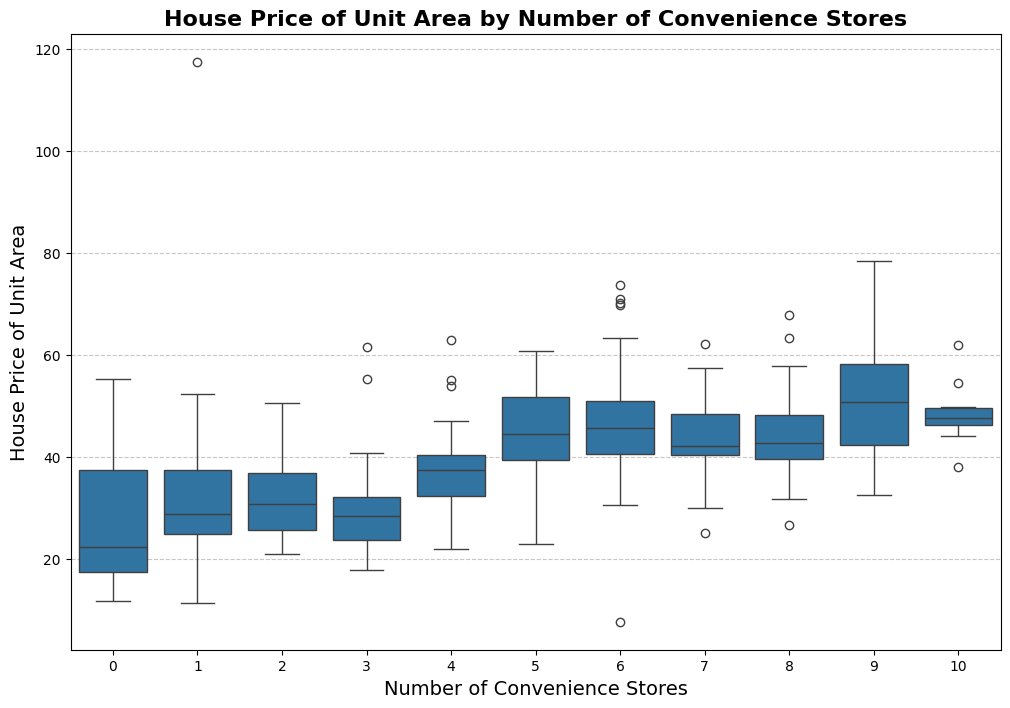

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='X4 number of convenience stores', y='Y house price of unit area', data=real_estate_data)
plt.title('House Price of Unit Area by Number of Convenience Stores', fontsize=16, fontweight='bold')
plt.xlabel('Number of Convenience Stores', fontsize=14)
plt.ylabel('House Price of Unit Area', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### The scatter plot shows the relationship between house price (per unit area), distance to MRT station and number of convenience stores. It can be seen that higher prices tend to be associated with homes closer to MRT stations and with more convenience stores. Also, the presence of points with a large number of stores and a short distance from the MRT station have lower prices, indicating that other factors also affect the price. In the histogram, most houses are between 10 and 15 years old, and the number of houses decreases with age. Most of the houses are located close to MRT stations, and the number of houses decreases sharply as the distance from the MRT station increases....It can be seen that most of the features do not follow the normal distribution. Some have left and right skewness and others have two peaks in the data distribution!

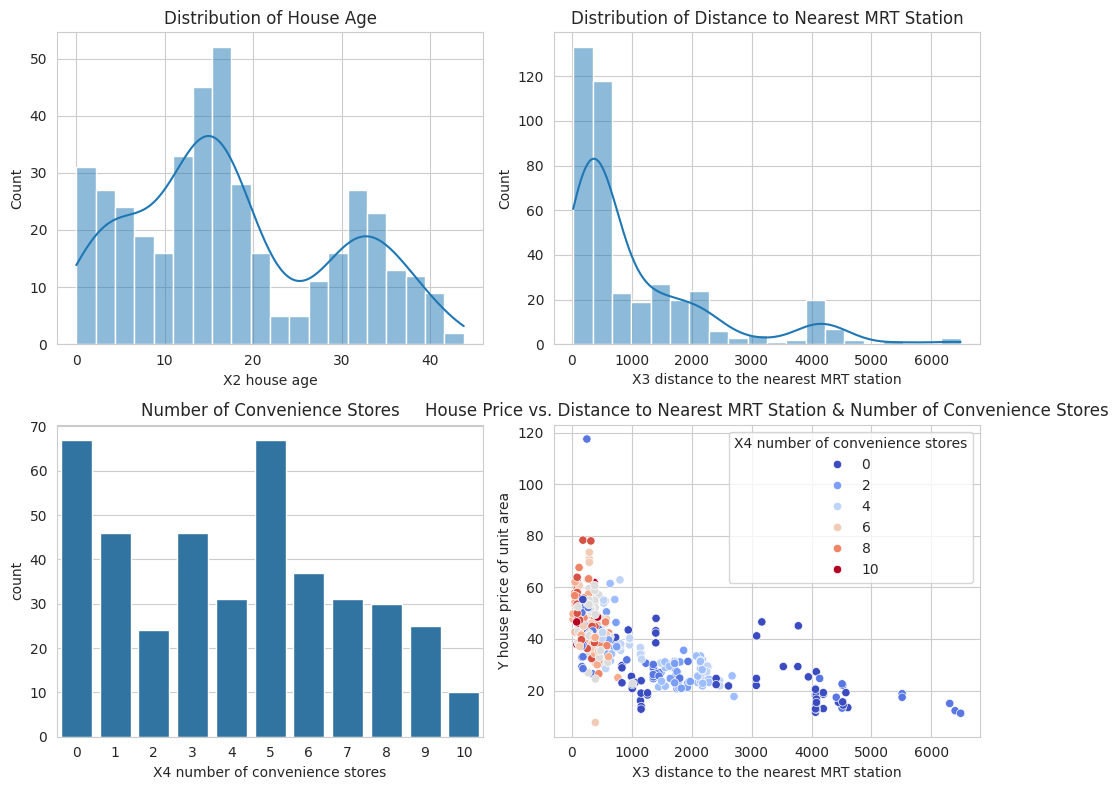

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(real_estate_data['X2 house age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of House Age')

sns.histplot(real_estate_data['X3 distance to the nearest MRT station'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Distance to Nearest MRT Station')

sns.countplot(x='X4 number of convenience stores', data=real_estate_data, ax=axes[1, 0])
axes[1, 0].set_title('Number of Convenience Stores')

sns.scatterplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', hue='X4 number of convenience stores', data=real_estate_data, palette="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title('House Price vs. Distance to Nearest MRT Station & Number of Convenience Stores')

plt.tight_layout()
plt.show()


### It shows scatter plot and histograms for different variables and unit price of houses. The variables examined are house age, distance to the nearest metro station (MRT), latitude, longitude, and area, and the response or target variable is price per unit area (Y). (X2 house age) the presence of a relatively negative relationship with the unit area price; Newer houses may be more expensive. (X3 distance to nearest MRT station) shows a strong negative relationship; The closer the houses are to the MRT station, the higher the price. (X5 latitude) and (X6 longitude) represent specific geographic coordinate patterns that may be associated with specific neighborhoods and their associated prices.

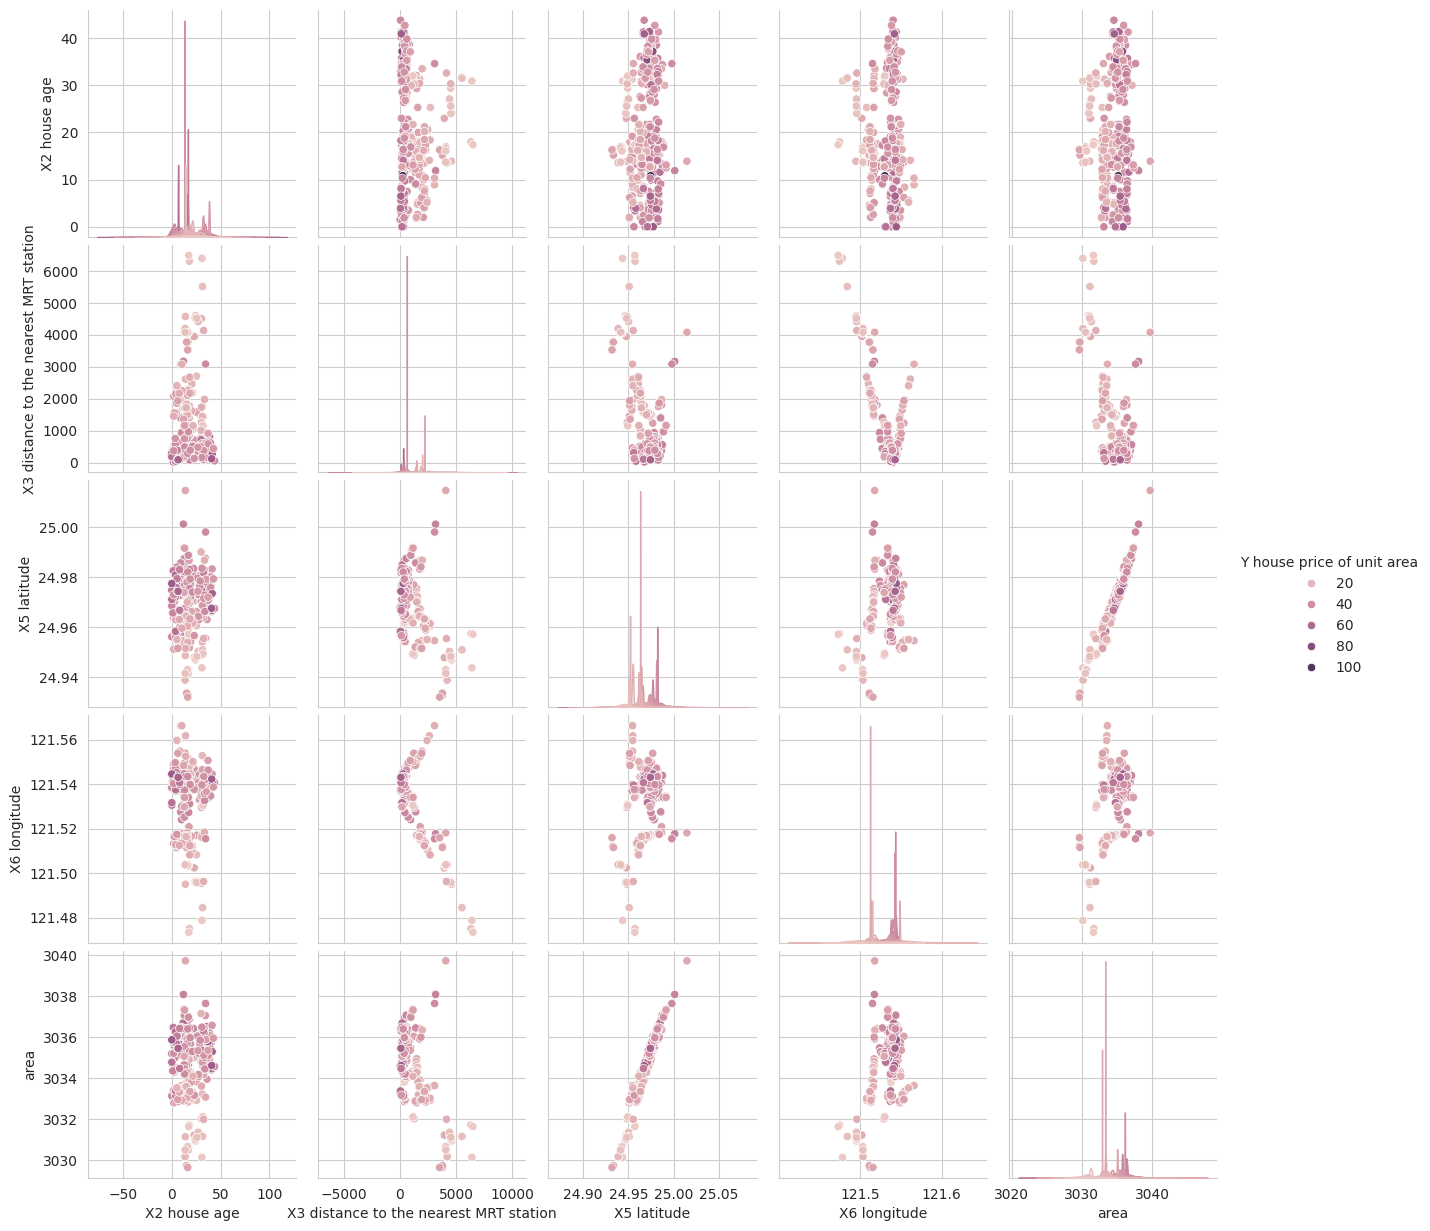

In [ ]:
data = real_estate_data.drop(columns=['X4 number of convenience stores', 'X1 transaction date'])
sns.pairplot(data, diag_kind='kde', hue='Y house price of unit area')
plt.show()

# Check for outliers

#### To check outlier data for each variable, the points that are outside the range (mean-2*sigma , mean+2*sigma) are considered as outlier data and these imputed with the average of each feature. In order to better remove these data, the ranges (mean-sigma , mean+sigma) and (mean-3*sigma , mean+3*sigma) have also been checked, but the mentioned initial range has performed better.

In [ ]:
def replace_outliers_with_median(df):
    df_out = df.copy()
    for column_name in df.select_dtypes(include=[np.number]).columns:
        mean = df[column_name].mean()
        std_dev = df[column_name].std()
        mean = df[column_name].mean()
        outliers = (df[column_name] < (mean - 3*std_dev)) | (df[column_name] > (mean + 3*std_dev))
        df_out.loc[outliers, column_name] = mean
    return df_out
real_estate_data_filtered = replace_outliers_with_median(real_estate_data)

## Applying a logarithmic transformation to the target(house price of unit area).

#### But it worsened the normality of the feature.

In [ ]:
real_estate_data_filtered["Y house price of unit area"] = np.log1p(real_estate_data_filtered["Y house price of unit area"])

## Applying Box-cox technique

## Redraw the chart after checking for outliers

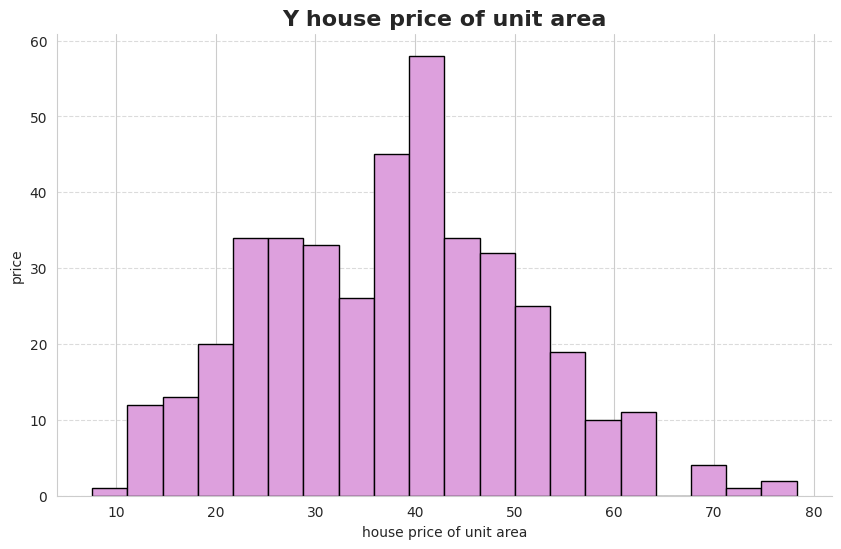

In [ ]:
plt.figure(figsize=(10, 6))
real_estate_data_filtered['Y house price of unit area'].plot(kind='hist', bins=20, color='plum', edgecolor='black')
plt.xlabel('house price of unit area')
plt.ylabel('price')
plt.title('Y house price of unit area', fontsize=16, fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

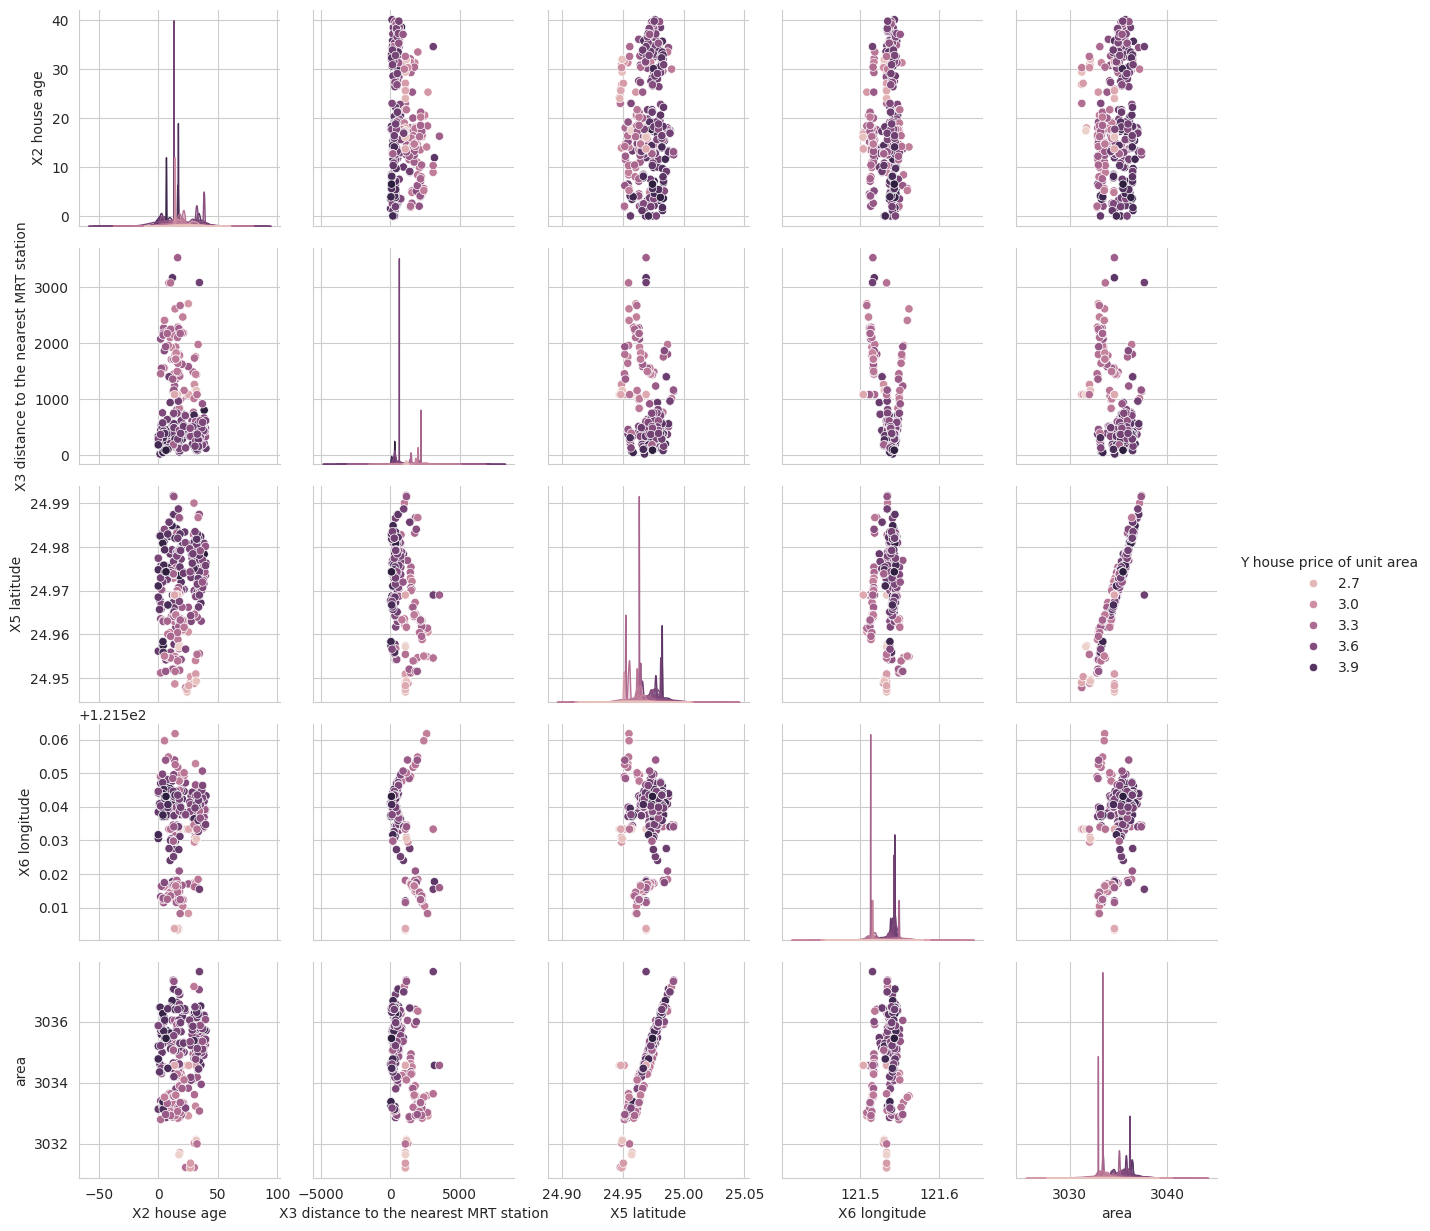

In [ ]:
data = real_estate_data_filtered.drop(columns=['X4 number of convenience stores', 'X1 transaction date'])
sns.pairplot(data, diag_kind='kde',hue='Y house price of unit area')

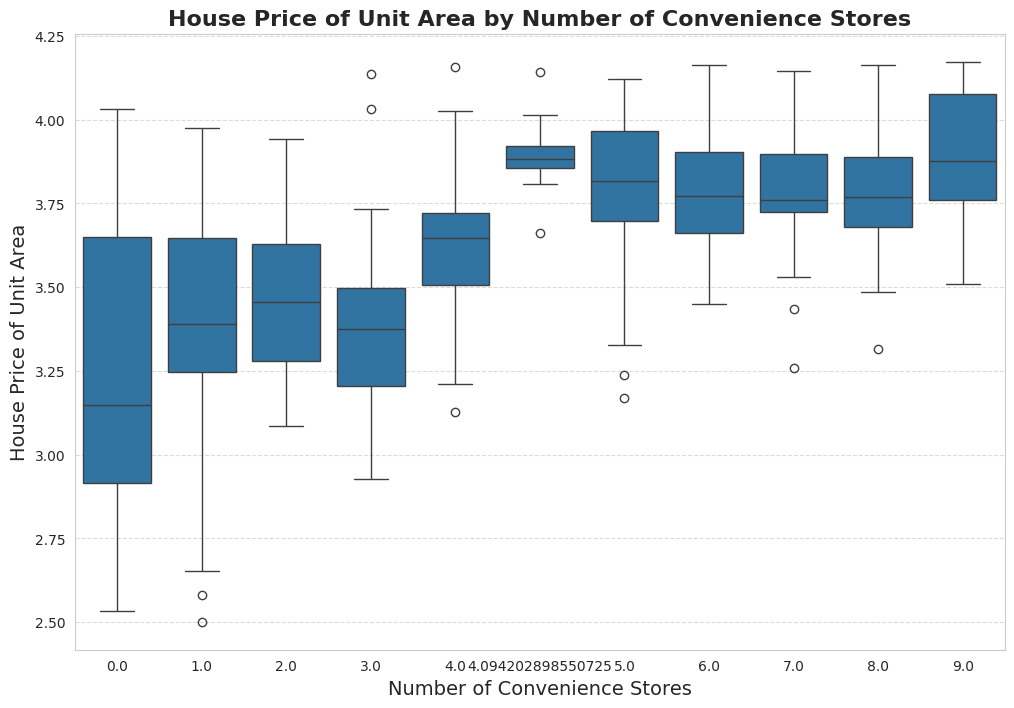

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='X4 number of convenience stores', y='Y house price of unit area', data=real_estate_data_filtered)
plt.title('House Price of Unit Area by Number of Convenience Stores', fontsize=16, fontweight='bold')
plt.xlabel('Number of Convenience Stores', fontsize=14)
plt.ylabel('House Price of Unit Area', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# C. Conduct the following tests. Include Null and Alternative hypothesis:
## i. Test if the average price per unit area of houses above the median age is significantly different from those below the median age. Use p-value method.


#### The code output shows the results of an independent t-test to determine if there is a significant difference in the average price per unit area of ​​homes that are older than the median (above the median age) compared to homes that are younger. , is used. The t-statistic value is equal to -4.98, which indicates that the average price per unit area for houses with an age above the median is significantly lower than for houses with an age below or equal to the median. The p-value is 9.22e-07, which is much less than 0.05. Since the p-value is much less than 0.05, we can conclude with high confidence that there is a significant difference in the mean prices. In other words, this result shows that the age of houses has a significant effect on their price per unit area, with old houses having a lower average price than newly built houses.

In [ ]:
median_age = real_estate_data['X2 house age'].median()
above_median_age = real_estate_data[real_estate_data['X2 house age'] > median_age]['Y house price of unit area']
below_median_age = real_estate_data[real_estate_data['X2 house age'] <= median_age]['Y house price of unit area']

t_stat, p_value = stats.ttest_ind(above_median_age, below_median_age)
t_stat, p_value

(-5.120576248709274, 4.6856518282790256e-07)

## ii.	Investigate if the average price per unit area significantly differs by the number of convenience stores (categorized by "X4 number of convenience stores").

#### ANOVA test is used to determine whether there are significant differences between the means of three or more groups. This test is especially useful when we want to determine whether a quantitative variable (such as the price per unit area of ​​a house) varies by different levels of a categorical variable (such as the number of convenience stores). The test statistic is equal to 24.920, which indicates a significant difference between the groups. The p-value is very low (1.1e-36), well below the common threshold level of 0.05. This means that we can say with high confidence (more than 99.99%) that there is a difference in average price per unit area between different groups with different number of convenience stores.Therefore, these results show that the number of convenience stores is significantly related to the unit area price of houses and is considered as an important variable in determining the price of houses.

In [ ]:
anova_result = stats.f_oneway(*(real_estate_data[real_estate_data['X4 number of convenience stores'] == i]['Y house price of unit area'] for i in range(real_estate_data['X4 number of convenience stores'].max()+1)))
anova_result


### iii. Choose two categorical variables and test if there's a significant association between them. (You may need to categorize some of the numerical variables.)

#### The Chi-square (χ²) test is used to determine whether there is a significant relationship between two categorical variables. Since the p-value is very small, it can be concluded with very high confidence (with an error level of less than 0.05) that there is a significant relationship between the number of convenience stores and the age category of the houses. In other words, these results show that the distribution of new and old houses between the number of different convenience stores is not random and there is a pattern of dependence between these two variables.

In [ ]:
from scipy.stats import chi2_contingency

median_age = real_estate_data['X2 house age'].median()
real_estate_data['Age Category'] = ['Old' if age > median_age else 'New' for age in real_estate_data['X2 house age']]

contingency_table = pd.crosstab(real_estate_data['X4 number of convenience stores'], real_estate_data['Age Category'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2}, p-value: {p}")

# D.	Calculate the correlation between each variable and the target variable ("Y house price of unit area") to find which variable has the highest influence on the target.

#### The correlation coefficient is a coefficient between the interval (1 and -1) where values ​​close to 1 or -1 indicate a strong positive or negative linear correlation and values ​​close to 0 indicate no correlation or weak linear correlation. Comparing the variables with the target variable, distance to the nearest MRT station, number of convenience stores, area respectively have the highest correlation.

In [ ]:
correlation_matrix = real_estate_data_filtered.drop(columns=['X1 transaction date']).corr()
correlation_matrix

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,area,Transaction Date
X2 house age,1.000000,-0.007620,0.049593,0.058357,-0.021541,-0.210912,0.040207,0.017583
X3 distance to the nearest MRT station,-0.007620,1.000000,-0.614178,-0.619126,-0.767698,-0.677262,-0.705342,0.047642
X4 number of convenience stores,0.049593,-0.614178,1.000000,0.464153,0.439316,0.611777,0.510432,0.009603
X5 latitude,0.058357,-0.619126,0.464153,1.000000,0.402754,0.580561,0.978709,0.024366
X6 longitude,-0.021541,-0.767698,0.439316,0.402754,1.000000,0.514739,0.564139,-0.026568
Y house price of unit area,-0.210912,-0.677262,0.611777,0.580561,0.514739,1.000000,0.636100,0.081694
area,0.040207,-0.705342,0.510432,0.978709,0.564139,0.636100,1.000000,0.012812
Transaction Date,0.017583,0.047642,0.009603,0.024366,-0.026568,0.081694,0.012812,1.000000


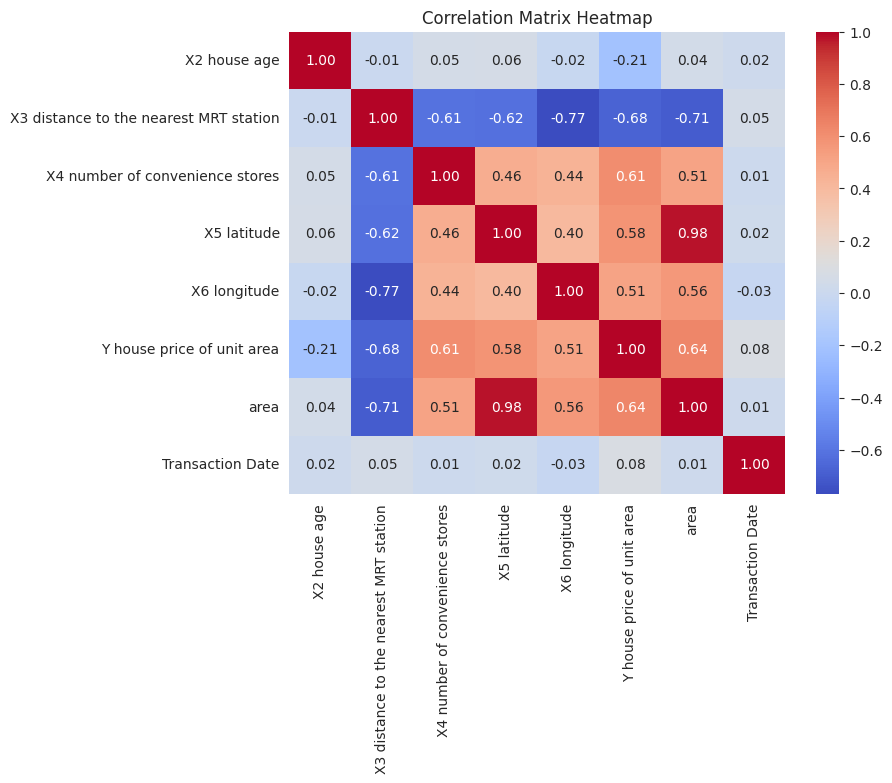

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Among the variables that affect the target, the number of metro stations around the house has the highest correlation and relationship with house price, so this variable is included in the model to form a simple linear regression model.
* Although the overall value of the correlation coefficient is not high!

In [ ]:
highest_correlation = correlation_matrix['Y house price of unit area'].drop('Y house price of unit area').abs().idxmax()
print(f"Variable with the highest influence on 'Y house price of unit area': {highest_correlation}")

Variable with the highest influence on 'Y house price of unit area': X3 distance to the nearest MRT station


# E.	Use scikit learn to test-train split train simple linear regression model and extract the weights to confirm your findings from the last question.

simple linear model between distance to the nearest MRT and house price of unit area

In [ ]:
X = real_estate_data[[highest_correlation]]
y = real_estate_data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

weights = model.coef_
print("Model weights:", weights)

Model weights: [-9.50436717]


#### Despite the fact that there is one feature that has the highest correlation with the target, we can see that the accuracy is not high in model for the test data, and the model is in underfitted situation, more variables need to be added to the model.

In [ ]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


r_squared = r2_score(y_test, y_pred)
print("R-squared (R^2):", r_squared)

Mean Squared Error (MSE): 87.28441128858768
Root Mean Squared Error (RMSE): 9.342612658597577
R-squared (R^2): 0.4780424538316692
